# CFEP3. A criterion for eigenvectors

In the previous notebooks we noted that it is important to optimally select reaction coordinates (RC) for accurate description of projected dynamics by diffusive models. The committor function is an important example of optimal RC. The eigenvectors (EVs) of the transfer operator are another example [1]. They have  the advantage of not requiring the specification of boundary nodes, which can be difficult for complex systems.


In this notebook we will consider a validation/optimality criterion for eigenvectors, constructed from cut profiles. It is a generalization of the $Z_{C,1}$ criterion for the committor function considered before. The equations for an eigenvector and the committor functions have a similar generic form. The specific difference leads to a modification of the criterion. The criterion equals to the ($-\ln$ of the) ratio of two cut profiles:

$$\theta(x,\Delta t)=-\ln\frac{Z_{C,1}(x,\Delta t)}{(1-e^{-\mu \Delta t})Z_{C,1}^0(x,\Delta t)},$$

here, $\mu$ is the corresponding eigenvalue, $Z_{C,1}$ is the standard cut profile, while $Z_{C,1}^0$ is the cut profile computed in the following way: for every transition from $r(t) \rightarrow r(t+\Delta t)$ in the trajectory, one makes following transitions $r(t)\rightarrow 0\rightarrow r(t+\Delta t)$, and then computes $Z_{C,1}$ for such modified trajectory. Or, alternatively, for every point in the time-series $r(k\Delta t)$  one considers transitions $0\rightarrow r(k\Delta t) \rightarrow 0$. For details and derivation see [1]


### validation criterion

If putative RC time-series $u(i\Delta t)$ closely approximates eigenvector $u$ and corresponding eigenvalue $\mu$, then $\theta(x,\Delta t)\approx 0$ for all $x$ and $\Delta t$.

### optimality criterion

For a sub-optimal RC time-series, $\theta(x,\Delta t)$ generally is smaller than zero. And the larger the difference $\theta(x,\Delta t_1) - \theta(x,\Delta t_2)$ for $\Delta t_1>\Delta t_2$ the less optimal the RC time-series is around $x$.

<details>
<summary>

#### click here to see some more math
</summary>

$Z_{C,1}^0(x,\Delta t)$ depends on $\Delta t$ in the simple way: $Z_{C,1}^0(x,\Delta t)=Z_{C,1}^0(x,1)/\Delta t$.

An accurate estimate of $\mu$ can be obtained from the eigenvector time-series $\mu=-\ln C(u,\Delta t_{inf})/\Delta t_{inf}$, where $C(u,\Delta t)=\langle u(t+\Delta t)u(t)\rangle /\langle u^2(t)\rangle$. If the putative RC time-series closely approximates an eigenvector, then the precise choice of $\Delta t_{inf}$ is not important. If the putative RC is not a very accurate approximation of an eigenvector, then large values of $\Delta t_{inf}$ may mask deficiencies of the RC. However, very large values of $\Delta t_{inf}$, may make precise estimation of the exponentially small value of $C(u,\Delta t)$, which scales as $\exp(-\mu \Delta t)$ difficult; one may need a much longer trajectory.

Below we illustrate the usage of the criterion on the model systems and a protein folding trajectory. First we need to import some function from the math module and cfep library.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="The raw code for this Python notebook is by default hidden for easier reading. Click here to toggle on/off the raw code."></form>''')

In [2]:
from math import sin,cos,pi,log,exp
from cfeplib import comp_diffusion_euler
import numpy as np

In [3]:
def f(x): return 0

def D(x): return 1

dt=0.001
np.random.seed(0)
traj=comp_diffusion_euler(f,D,dt,1000000)

We first consider free diffusion. We compute timeseries of brownian motion with $\Delta t=0.001$. Eigenvectors for free diffusion are simple $\sin(kx)$ and $\cos(kx)$ for any $k$. Consider for example $u(x)=\cos(\pi x)$. We project the computed trajectory on the eigenvector, by computing the value of eigenvector for every trajectory frame.

In [4]:
ev1=np.cos(pi*traj)

We import function comp_eval that estimates the corresponding eigenvalue, and consider the estimate for a range of $\Delta t_{inf}=1,2,4,...,2^{10}$.

In [5]:
from cfeplib import comp_eval

ldt=[2**i for i in range(11)]
print ('dt_inf, eval')
for dt in ldt:
    try: print (dt,comp_eval(ev1,dt)/.001) # divide by dt=0.001 of the diffusion trajectory timestep
    except: pass

dt_inf, eval
1 9.847474344220185
2 9.856345333185303
4 9.846924558439563
8 9.857801289679053
16 9.872862038747302
32 9.874967196611905
64 9.91842763468084
128 10.011208872322966
256 10.401242393505983
512 8.753862039347627


As one can see the estimates of the eigenvalue are rather close to the theoretical value of $\pi^2 \approx 9.8696$. Only estimates with $\Delta t>256$ start to show large fluctuations. We take as 32 as the optimal choice for $\Delta t_{inf}$.

Next we import function comp_theta. It computes $Z_{C,1}^0$ internally.

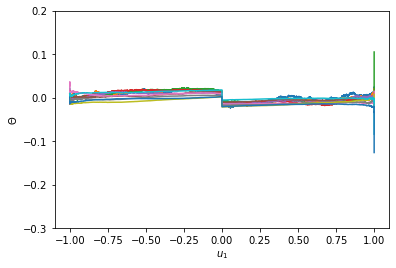

In [6]:
from cfeplib import comp_theta
lx,ltheta=comp_theta(ev1,ldt,tinf=32,dx=0.0001)
%matplotlib inline
import matplotlib.pyplot as plt
for ly in ltheta:
    plt.plot(lx,ly)
plt.ylim((-0.3,0.2))
plt.xlabel('$u_1$')
_=plt.ylabel('$\Theta$')

The abrupt change around u=0, is due the fact that this eigenvector time-series is not orthogonal to the zeroth ($\mu=0$) eigenvector time-series, which is constant $u_0(t)=1$. Lets orthogonalize this eigenvector using the following equation:
$$u=u-u_0\frac{<u,u_0>}{<u_0,u_0>},$$
where $$<v,u>=\sum_t v(t)u(t)$$ is the scalar product. Since $u_0(t)=1$, orthogonalization is equivalent to subtracting the mean of $u$.

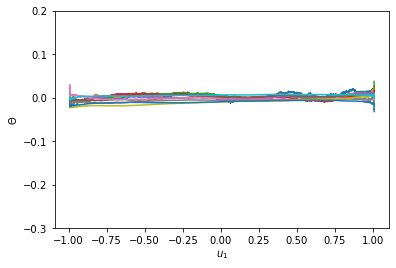

In [7]:
ev1=ev1-sum(ev1)/len(ev1)

from cfeplib import comp_theta
lx,ltheta=comp_theta(ev1,ldt,tinf=32,dx=0.0001)
%matplotlib inline
import matplotlib.pyplot as plt
for ly in ltheta:
    plt.plot(lx,ly)
    
plt.ylim(-0.3,0.2)
plt.xlabel('$u_1$')
_=plt.ylabel('$\Theta$')

As expected the $\theta$ criterion fluctuates around zero; it is bounded by $\pm 0.02$, which means that the computed time-series closely approximates an eigenvector.

To illustrate the behavior of the criterion on a coordinate different from an eigenvector, we consider a superposition of two eigenvectors $\cos(\pi x)+0.5 \cos(5\pi x)$. First we consider the dependence of the estimated $\mu$ on the sampling interval $\Delta t$.

In [8]:
ev12=np.cos(pi*traj)+0.5*np.cos(5*pi*traj)
print ('dt_inf, eval')
for dt in ldt:
    try: print (dt,comp_eval(ev12,dt)/0.001)
    except: pass

dt_inf, eval
1 53.0171514903098
2 49.16717199672375
4 42.53521298431314
8 33.16497820724843
16 23.55639484565861
32 16.79256332469188
64 13.329944694566441
128 11.71500950377905
256 11.167923410262913
512 9.429075541369313


As the $\Delta t$ increases the contribution from the second eigenvector decreases (exponentially). In particular estimate for $\Delta t=512$ is rather close to the true value.

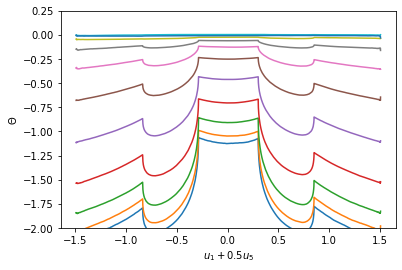

In [9]:
ev12=ev12-sum(ev12)/len(ev12)

lx,ltheta=comp_theta(ev12,ldt,tinf=512,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.ylim(-2,0.25)
plt.xlabel('$u_1+0.5u_5$')
_=plt.ylabel('$\Theta$')

The criterion shows that the putative RC is very suboptimal and that with $\Delta t$ increasing it is becoming less suboptimal, i.e., for the last few values of $\Delta t$ $\theta(x,\Delta t)\approx 0$.

Next we consider the Ornstein–Uhlenbeck process, i.e., diffusion in the force field  $f(x)=-x$. The eigenvectors of the transfer operator are the Hermite polynomials, with the first few being: $1$, $x$, $1-x^2$.

In [10]:
def f(x): return -x

def D(x): return 1

dt=0.01
np.random.seed(0)
traj=comp_diffusion_euler(f,D,dt,1000000)

Validation of the first eigenvector/eigenfunction $u_1(x)=x$:

dt_inf, eval
1 0.9946944190531095
2 0.9957670327409768
4 0.9956394110673911
8 0.9954164407535149
16 0.9961149121436436
32 0.9955686308269867
64 0.9964724553792558
128 0.9838384426494078
256 1.0384241151221238
1024 0.4232689011008101


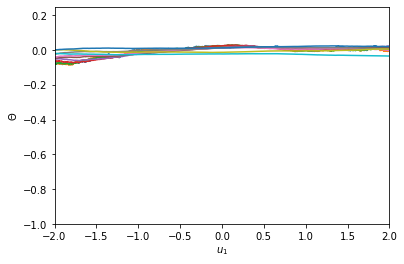

In [11]:
ev1=traj-sum(traj)/len(traj)

print ('dt_inf, eval')
for dt in ldt:
    try: print (dt,comp_eval(ev1,dt)/0.01)
    except: pass

lx,ltheta=comp_theta(ev1,ldt,tinf=64,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-2,2)
plt.ylim(-1,0.25)
plt.xlabel('$u_1$')
_=plt.ylabel('$\Theta$')

Here we need to limit the range of x considered because for large $x$ the sampling is very limited due to large $U(x)$, and statistical errors in estimations of cut profiles are large. $\theta(x\Delta t)\approx 0$ for $|x|<2$.

Validation of the second eigenvector/eigenfunction $u_2(x)=1-x^2$

dt_inf, eval
1 2.0634342128110847
2 2.0635878691609473
4 2.0618610469305696
8 2.0547880452686114
16 2.043386766719208
32 2.0395831315526416
64 2.0652464781642803
128 2.0410508022077978
256 2.3974742059371366


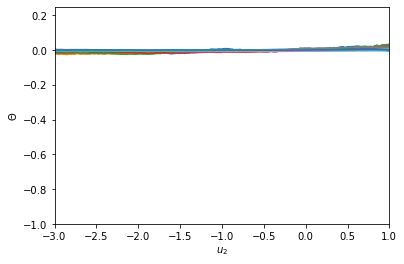

In [12]:
ev2=1-traj*traj
ev2=ev2-sum(ev2)/len(ev2)

print ('dt_inf, eval')
for dt in ldt:
    try: print (dt,comp_eval(ev2,dt)/0.01)
    except: pass

lx,ltheta=comp_theta(ev2,ldt,tinf=16,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-3,1)
plt.ylim(-1,0.25)
plt.xlabel('$u_2$')
_=plt.ylabel('$\Theta$')

For the sum of the first two eigenvectors we obtain result similar to the above: the obtained times series is different from an eigenvector; it becomes closer to the first eigenvector if considered at large timescale, where contribution of the second eigenvector decreases exponentially.

In [ ]:
ev12=1-traj*traj+traj
ev12=ev12-sum(ev12)/len(ev12)

print ('dt_inf, eval')
for dt in ldt:
    try: print (dt,comp_eval(ev12,dt)/0.01)
    except: pass

lx,ltheta=comp_theta(ev12,ldt,tinf=256,dx=0.001)

for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-10,2)
plt.ylim(-1,0.25)
plt.xlabel('$u_1+u_2$')
_=plt.ylabel('$\Theta$')

dt_inf, eval
1 1.7360423915794654
2 1.7345234135892025
4 1.7325110078692516
8 1.72736818132871
16 1.71706628276501
32 1.695364967384777
64 1.6648638452114373
128 1.5696616867633406
256 1.495250072300298


While here we illustrated the criterion on the one-dimensional stochastic processes, the criterion is equally applicable to the putative time-series of eigenvectors describing multidimensional processes.

### Eigenvectors of protein folding dynamics
To illustrate the criterion on a more realistic example we consider two RCs approximating first and second eigenvectors of protein folding dynamics, namely, the HP35 double mutant trajectory reported by D. Shaw [2]. The eigenvectors were obtained with a nonparametric approach as described in [1].

In [ ]:
# load eigenvectors
import numpy as np
evs=np.load('2f4k.npz')['evs']

ldt=[2**i for i in range(11)]
lx,ltheta=comp_theta(evs[:,0],ldt,tinf=1024,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-1.8,1.3)
plt.ylim(-1,0.25)
plt.xlabel('$u_1$')
_=plt.ylabel('$\Theta$')

In [ ]:
lx,ltheta=comp_theta(evs[:,1],ldt,tinf=1024,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-0.5,4.45)
plt.ylim(-1,0.25)
plt.xlabel('$u_2$')
_=plt.ylabel('$\Theta$')

The values of the $\theta$ function are around zero, close to the range of expected statistical fluctuations, validating that the two determined RCs closely approximate the eigenvectors.

[1] S. Krivov, Blind analysis of molecular dynamics. [*J. Chem. Theory Comput*. 2021, **17**, 2725–2736](https://pubs.acs.org/doi/abs/10.1021/acs.jctc.0c01277)

[2] Piana, S.; Lindorff-Larsen, K.; Shaw, D. E. Protein folding kinetics and thermodynamics from atomistic simulation. [*Proc. Natl. Acad. Sci. U. S. A.* 2012, **109**, 17845–17850](https://www.pnas.org/content/109/44/17845)